## The Titanic Dataset
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

### Some Column Descriptions
__Pclass:__ A proxy for socio-economic status (SES), 1st = Upper, 2nd = Middle, 3rd = Lower<br>
__Age:__	Age in years	
__SibSp:__	# of siblings / spouses aboard the Titanic	
__Parch:__	# of parents / children aboard the Titanic		
__Fare:__	Passenger fare	
__Cabin:__	Cabin number	
__Embarked:__	Port of Embarkation

### Possible Questions
- 1: How many people (from this dataset) actually survived?
- 2: Which variables could be related to the chances of someone surviving or not?
- 3: Is there any relation between the Survived variable and the variables Age, Sex, Passenger Class?

In [1]:
# Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the CSV into a Dataframe and having a brief look at it
df = pd.read_csv('./titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Total survivors on this data set
df[df.Survived == 1]['Survived'].count()

342

### Answering question <font color=blue>1)</font>, there were 342 survivors on this dataset out of 891.

In [4]:
def genderToInt(gender):
    """Converts a gender string to an integer."""
    if gender == 'female':
        return 0
    else:
        return 1
    
def intToGender(value):
    """Converts an integer to a gender string."""
    if value == 0:
        return "Female"
    else:
        return "Male"

# This will allow us to analyze the
# correlation of the Sex variable
df['Sex'] = df['Sex'].apply(genderToInt)

In [5]:
# Before we start analyzing the variables, let's check the correlation between them 
# in order to figure out which ones we should analyze.
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


### We can use the table bellow to check the correlation between the Survived variable and the other ones. 
### This helps us answer question <font color=blue>2):</font>
    - Besides the variables Pclass, Sex and Age, the only other variable that seems to be related is Fare, however, we already will analyze Pclass which is related to Fare since the higher the class the higher the fare.

#### Now that we know which variables we're going to analyze, let's take a look at a Summary of them.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


#### Based on the table above, we can see that there is probably some data missing on the Age column as it has less values then the other ones. We should check if any other columns might also have NaN or values missing.

In [7]:
# Checking which columns have null values
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [8]:
# Checking how many null values we have per column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It seems that from the __891__ passengers, we're missing __177__ age, __687__ Cabin and __2__ embarked data.<br>
Of these three variables, we'll only use __Age__ for our analysis. So we need to handle this missing data on this column.

The approach used will be to fill the missing points with the __median__. Since with have children and elders, it's not that interesting to use the mean due to some outliers. And since we have a reasonable number of missing data points, it is not a good idea to drop these values.

In [9]:
# Fills the Age (integer) column with the median.
df.fillna(df.median(), inplace=True)
# Checking which columns have null values
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### Analyzing Passenger Class and Survival

In [10]:
# Total people per class
df_pclass = df.groupby(['Pclass']).size()
df_pclass

Pclass
1    216
2    184
3    491
dtype: int64

In [11]:
# Total people that survived (or not) by Passanger Class
df_pclass_survival = df.groupby(['Pclass', 'Survived']).size()
df_pclass_survival

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [12]:
# Analyzing the percentage of survivors based on each class
df_pclass = df_pclass_survival.groupby(level = 0).apply(lambda x: 100*x / float(x.sum()))
df_pclass

Pclass  Survived
1       0           37.037037
        1           62.962963
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
dtype: float64

### As of now, we are led to belive that being in the First and Second class led to a better chance of survival. Specially the first class which had over 62% of survivors, on the other hand, the third class had 24% of survivors.

### The next step we'll be to analyze the gender of the survivors

In [13]:
# Converting the Sex variable back to a string 
df['Sex'] = df['Sex'].apply(intToGender)

# Total people per gender
df_gender = df.groupby(['Sex']).size()
df_gender

Sex
Female    314
Male      577
dtype: int64

In [14]:
# Total people that survived (or not) by gender
df_gender_survival = df.groupby(['Sex', 'Survived']).size()
df_gender_survival

Sex     Survived
Female  0            81
        1           233
Male    0           468
        1           109
dtype: int64

In [15]:
# Analyzing the percentage of survivors based on gender
# 0: Female 1: Male
df_gender = df_gender_survival.groupby(level = 0).apply(lambda x: 100*x / float(x.sum()))
df_gender

Sex     Survived
Female  0           25.796178
        1           74.203822
Male    0           81.109185
        1           18.890815
dtype: float64

### Even though there were more men aboard, almost 75% of all women survived, on the other hand, over 18% of all men didn't make it. It seems that women had a better chance of surviving.

### The next step we'll be to analyze the age of the survivors

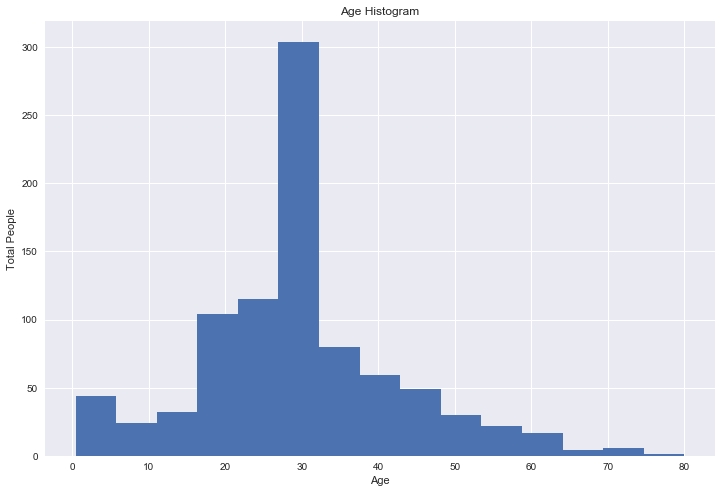

In [16]:
# Let's analyze the age of the passengers
df['Age'].hist(figsize=(12,8), bins=15)
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Total People")

#### The majority of people on the ship were between 18 and 35 years.

In [17]:
# Creating Age Ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
group_labels = ["0 to 10", "11 to 20", "21 to 30", "31 to 40", "41 to 50", "51 to 60", "61 to 70", "71 to 80"]
df['AgeBins'] = pd.cut(df['Age'], bins, labels=group_labels)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBins
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S,21 to 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C,31 to 40
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21 to 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S,31 to 40
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S,31 to 40


In [19]:
# Total People on Age Groups
pd.value_counts(df['AgeBins'])

21 to 30    407
31 to 40    155
11 to 20    115
41 to 50     86
0 to 10      64
51 to 60     42
61 to 70     17
71 to 80      5
Name: AgeBins, dtype: int64

In [20]:
# Total people that survived (or not) by Age
df_age_survival = df.groupby(['AgeBins', 'Survived']).size()
df_age_survival

AgeBins   Survived
0 to 10   0            26
          1            38
11 to 20  0            71
          1            44
21 to 30  0           271
          1           136
31 to 40  0            86
          1            69
41 to 50  0            53
          1            33
51 to 60  0            25
          1            17
61 to 70  0            13
          1             4
71 to 80  0             4
          1             1
dtype: int64

In [21]:
# Analyzing the percentage of survivors based on Age
df_age_survival = df_age_survival.groupby(level = 0).apply(lambda x: 100*x / float(x.sum()))
df_age_survival

AgeBins   Survived
0 to 10   0           40.625000
          1           59.375000
11 to 20  0           61.739130
          1           38.260870
21 to 30  0           66.584767
          1           33.415233
31 to 40  0           55.483871
          1           44.516129
41 to 50  0           61.627907
          1           38.372093
51 to 60  0           59.523810
          1           40.476190
61 to 70  0           76.470588
          1           23.529412
71 to 80  0           80.000000
          1           20.000000
dtype: float64

### It seems that the survival rate decrease as age increased. Almost 60% of all children below the age of 10 survived. This survival rate decreases rapidly as age increases

## Conclusion

### Based on our analyzis between the independent variable (Survived) and the dependent variables (Pclass, Sex an Age), we can answer question <font color=blue>3)</font>, it seems that most people who survived were people on the first class, women and children.  The dataset is not complete, so we cannot be 100% sure, but we're led to believe that there truly is a relation between these variables.

### <font color=green>For a better visualization, let's check some charts with more than two variables </font>

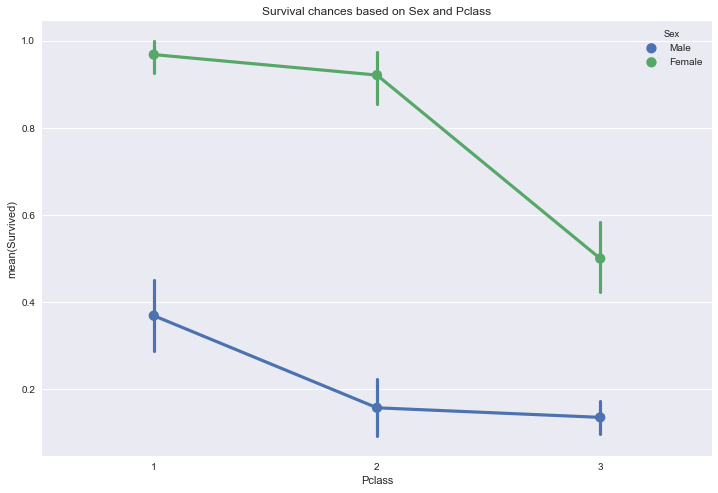

In [22]:
# The chart bellow represents the influence of Gender and Pclass on survival.
plt.figure(figsize=(12,8))
plt.title("Survival chances based on Sex and Pclass")
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=df, figsize=(12,8))

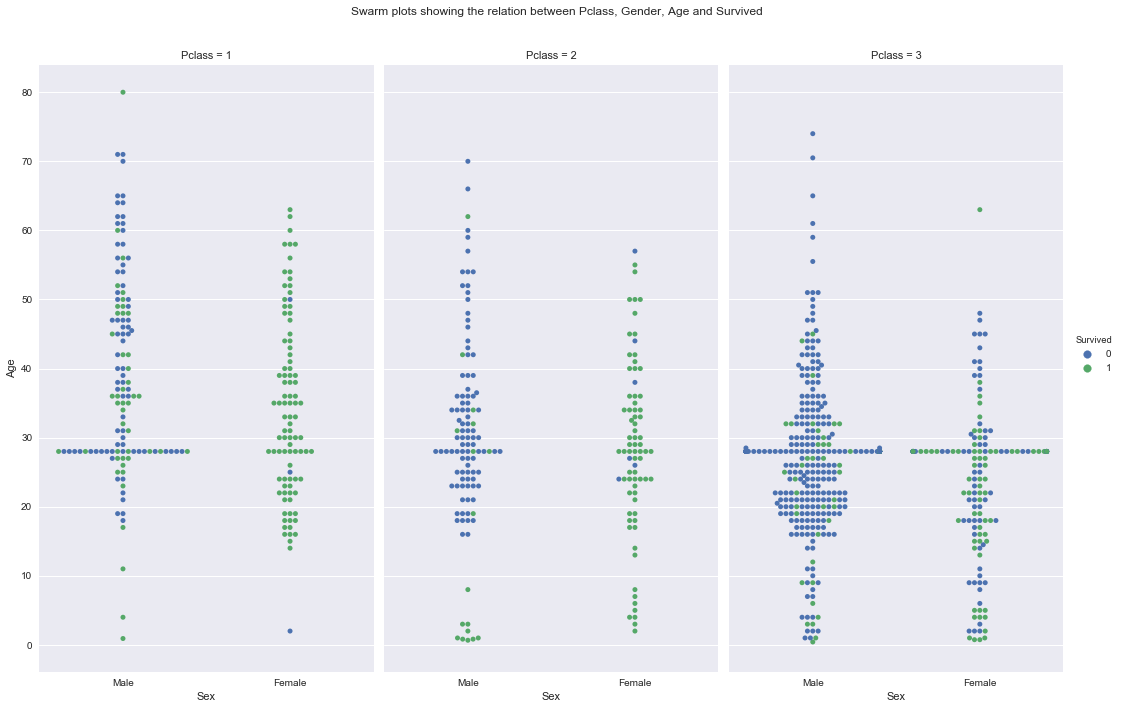

In [23]:
sns.factorplot(data=df, col='Pclass', x='Sex', y='Age', hue='Survived', 
               kind='swarm', size=10, aspect=0.5)
plt.subplots_adjust(top=0.9)
plt.suptitle("Swarm plots showing the relation between Pclass, Gender, Age and Survived")
plt.yticks(np.arange(0,81,10));